In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from termcolor import colored

In [2]:
"""Data"""

home = '/tudelft.net/staff-umbrella/rootzone/LS3MIP/mrsol/Regions/'

CESM2 = xr.open_dataset(home + 'mrsol_Emon_CESM2_land-hist_r1i1p1f1_2001-2010_EB.nc' , engine = 'netcdf4')
CMCC_ESM2 = xr.open_dataset(home + 'mrsol_Emon_CMCC-ESM2_land-hist_r1i1p1f1_2001-2010_EB.nc' , engine = 'netcdf4')
HadGEM3_GC31_LL = xr.open_dataset(home + 'mrsol_Emon_HadGEM3-GC31-LL_land-hist_r1i1p1f3_2001-2010_EB.nc' , engine = 'netcdf4')
IPSL_CM6A_LR = xr.open_dataset(home + 'mrsol_Emon_IPSL-CM6A-LR_land-hist_r1i1p1f1_2001-2010_EB.nc' , engine = 'netcdf4')
MIROC6 = xr.open_dataset(home + 'mrsol_Emon_MIROC6_land-hist_r1i1p1f1_2001-2010_EB.nc' , engine = 'netcdf4')
UKESM1_0_LL = xr.open_dataset(home + 'mrsol_Emon_UKESM1-0-LL_land-hist_r1i1p1f2_2001-2010_EB.nc' , engine = 'netcdf4')

"""SOMO.ML"""

"""East Brazil"""

home = '/tudelft.net/staff-umbrella/rootzone/Benchmark_soilmoisture_products'

"""Monthly data"""

layer_01_2001_2012_EB_monthly = xr.open_dataset(home + '/SoMo.ml_v1_layer1_2001_2012/SoMo.ml_v1_layer1_2001-2012_EB_monthly.nc' , engine = 'netcdf4')
layer_02_2001_2012_EB_monthly = xr.open_dataset(home + '/SoMo.ml_v1_layer2_2001_2012/SoMo.ml_v1_layer2_2001-2012_EB_monthly.nc' , engine = 'netcdf4')
layer_03_2001_2012_EB_monthly = xr.open_dataset(home + '/SoMo.ml_v1_layer3_2001_2012/SoMo.ml_v1_layer3_2001-2012_EB_monthly.nc' , engine = 'netcdf4')

L1 = np.zeros(120)
L2 = np.zeros(120)
L3 = np.zeros(120)

for i in range(120):
    L1[i] = layer_01_2001_2012_EB_monthly.layer1[i , : , :].mean()
    L2[i] = layer_02_2001_2012_EB_monthly.layer2[i , : , :].mean()
    L3[i] = layer_03_2001_2012_EB_monthly.layer3[i , : , :].mean()
    
Storage = L1 * 0.1 + L2 * 0.2 + L3 * 0.2
Storage = Storage * 1000 #convert to mm

In [3]:
"""Layer depths"""

print(CESM2.depth)
print()
print(CMCC_ESM2.depth)
print()
print(HadGEM3_GC31_LL.depth)
print()
print(colored('The 11 soil layers of IPSL_CM6A_LR correspond to the following depths:' , 'blue'))
print(colored('0.002 , 0.006 , 0.014 , 0.03 , 0.06 , 0.12 , 0.25 , 0.5 , 1.0 , 2.0' , 'blue'))
print()
print(IPSL_CM6A_LR.solay)
print()
print(MIROC6.depth)
print()
print(UKESM1_0_LL.depth)

<xarray.DataArray 'depth' (depth: 20)>
array([0.01, 0.04, 0.09, 0.16, 0.26, 0.4 , 0.58, 0.8 , 1.06, 1.36, 1.7 , 2.08,
       2.5 , 2.99, 3.58, 4.27, 5.06, 5.95, 6.94, 8.03])
Coordinates:
  * depth    (depth) float64 0.01 0.04 0.09 0.16 0.26 ... 5.06 5.95 6.94 8.03
Attributes:
    standard_name:  depth
    long_name:      depth_below_sea
    units:          m
    positive:       down
    axis:           Z
    bounds:         depth_bnds
    title:          depth
    type:           double

<xarray.DataArray 'depth' (depth: 15)>
array([7.100635e-03, 2.792500e-02, 6.225858e-02, 1.188651e-01, 2.121934e-01,
       3.660658e-01, 6.197585e-01, 1.038027e+00, 1.727635e+00, 2.864607e+00,
       4.739157e+00, 7.829766e+00, 1.292532e+01, 2.132647e+01, 3.517762e+01])
Coordinates:
  * depth    (depth) float64 0.007101 0.02792 0.06226 ... 12.93 21.33 35.18
Attributes:
    standard_name:  depth
    long_name:      depth
    units:          m
    positive:       down
    axis:           Z
    bounds:   

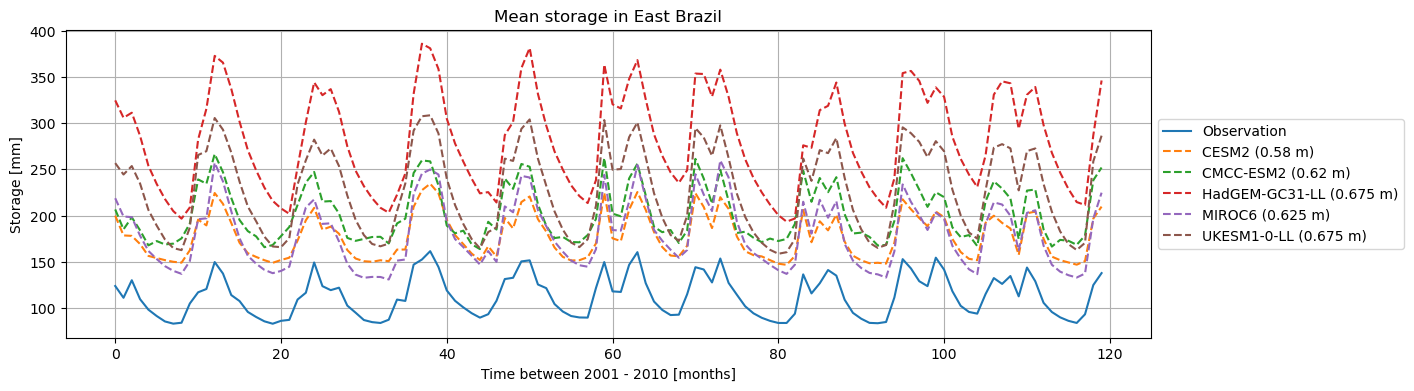

In [4]:
"""Calculating means for depth of layer close to 0.5 m"""

t = 120
CESM2_mean = np.zeros(t)
CMCC_ESM2_mean = np.zeros(t)
HadGEM3_GC31_LL_mean = np.zeros(t)
IPSL_CM6A_LR_mean = np.zeros(t)
UKESM1_0_LL_mean = np.zeros(t)
MIROC6_mean = np.zeros(t)

for i in range(t):
    CESM2_mean[i] = CESM2.mrsol[i , 0:7].mean()*7
    CMCC_ESM2_mean[i] = CMCC_ESM2.mrsol[i , 0:7].mean()*7
    HadGEM3_GC31_LL_mean[i] = HadGEM3_GC31_LL.mrsol[i , 0:3].mean() * 3
    IPSL_CM6A_LR_mean[i] = IPSL_CM6A_LR.mrsol[i , 0:5].mean() * 5
    MIROC6_mean[i] = MIROC6.mrsol[i , 0:3].mean() * 3
    UKESM1_0_LL_mean[i] = UKESM1_0_LL.mrsol[i , 0:3].mean() * 3
    
plt.figure(figsize = (14 , 4))
plt.title('Mean storage in East Brazil')
plt.ylabel('Storage [mm]')
plt.xlabel('Time between 2001 - 2010 [months]')
plt.plot(Storage , label = 'Observation')
plt.plot(CESM2_mean , linestyle = 'dashed' , label = 'CESM2 (0.58 m)')
plt.plot(CMCC_ESM2_mean , linestyle = 'dashed' , label = 'CMCC-ESM2 (0.62 m)')
plt.plot(HadGEM3_GC31_LL_mean , label = 'HadGEM-GC31-LL (0.675 m)' , linestyle = 'dashed')
plt.plot(MIROC6_mean , label = 'MIROC6 (0.625 m)' , linestyle = 'dashed')
plt.plot(UKESM1_0_LL_mean , label = 'UKESM1-0-LL (0.675 m)' , linestyle = 'dashed')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

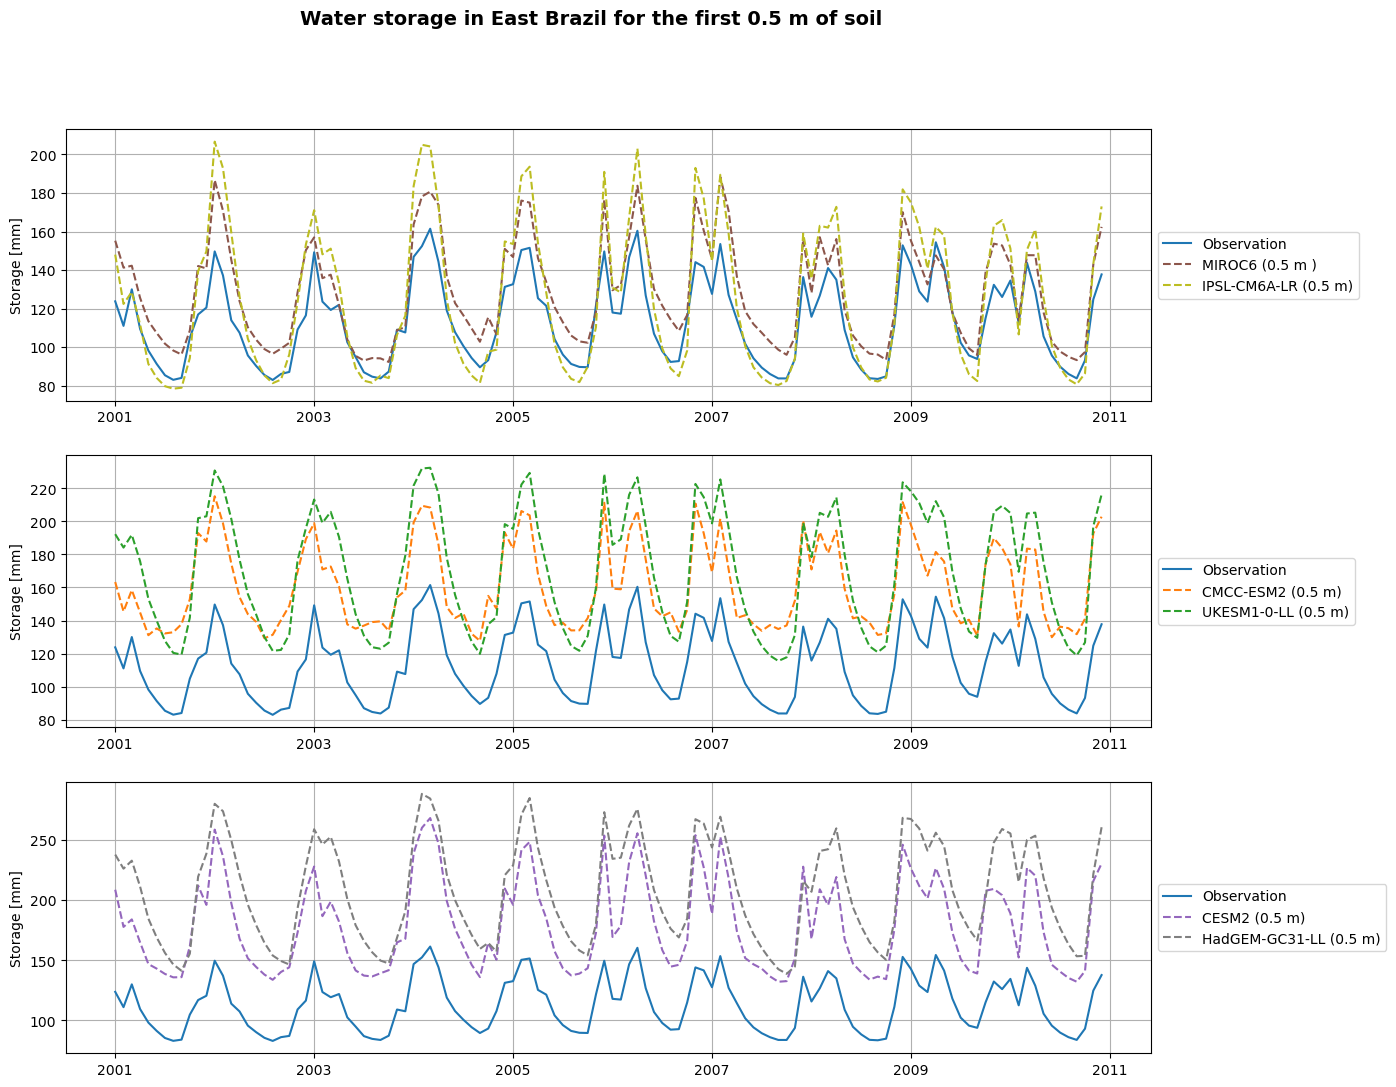

In [5]:
"""Corrected for thickness of layer"""

for i in range(t):
    CESM2_mean[i] = CESM2.mrsol[i , 6].mean() * 0.56 + CESM2.mrsol[i , 5].mean() + CESM2.mrsol[i , 4].mean() + CESM2.mrsol[i , 3].mean() + CESM2.mrsol[i , 2].mean() + CESM2.mrsol[i , 1].mean()* + CESM2.mrsol[i , 0].mean()
    CMCC_ESM2_mean[i] = CMCC_ESM2.mrsol[i , 6].mean()*0.54 + CMCC_ESM2.mrsol[i , 5].mean() + CMCC_ESM2.mrsol[i , 4].mean() + CMCC_ESM2.mrsol[i , 3].mean() + CMCC_ESM2.mrsol[i , 2].mean() + CMCC_ESM2.mrsol[i , 1].mean() + CMCC_ESM2.mrsol[i , 0].mean()
    HadGEM3_GC31_LL_mean[i] = HadGEM3_GC31_LL.mrsol[i , 2].mean() * 0.62 + HadGEM3_GC31_LL.mrsol[i , 1].mean() + HadGEM3_GC31_LL.mrsol[i , 0].mean()
    IPSL_CM6A_LR_mean[i] = IPSL_CM6A_LR.mrsol[i , 8].mean() + IPSL_CM6A_LR.mrsol[i , 7].mean() +IPSL_CM6A_LR.mrsol[i , 6].mean() + IPSL_CM6A_LR.mrsol[i , 5].mean() + IPSL_CM6A_LR.mrsol[i , 4].mean() + IPSL_CM6A_LR.mrsol[i , 3].mean() + IPSL_CM6A_LR.mrsol[i , 2].mean() + IPSL_CM6A_LR.mrsol[i , 1].mean() + IPSL_CM6A_LR.mrsol[i , 0].mean()
    MIROC6_mean[i] = MIROC6.mrsol[i , 2].mean() * 0.64 + MIROC6.mrsol[i , 1].mean() + MIROC6.mrsol[i , 0].mean()
    UKESM1_0_LL_mean[i] = UKESM1_0_LL.mrsol[i , 2].mean() * 0.62 + UKESM1_0_LL.mrsol[i , 1].mean() + UKESM1_0_LL.mrsol[i , 0].mean()
    

plt.figure(figsize = (14 , 12))
plt.subplot(311)
plt.plot(Storage , label = 'Observation')
#plt.plot(CESM2_mean , linestyle = 'dashed' , label = 'CESM2 (0.5 m)')
#plt.plot(CMCC_ESM2_mean , linestyle = 'dashed' , label = 'CMCC-ESM2 (0.5 m)')
#plt.plot(HadGEM3_GC31_LL_mean , label = 'HadGEM-GC31-LL (0.5 m)' , linestyle = 'dashed'
plt.plot(MIROC6_mean , label = 'MIROC6 (0.5 m )' , linestyle = 'dashed' , color = 'C5')
#plt.plot(UKESM1_0_LL_mean , label = 'UKESM1-0-LL (0.5 m)' , linestyle = 'dashed')
plt.plot(IPSL_CM6A_LR_mean , label = 'IPSL-CM6A-LR (0.5 m)' , linestyle = 'dashed' , color = 'C8')
plt.ylabel('Storage [mm]')
plt.xticks([0 , 2*12 , 4*12 , 6*12 , 8*12 , 10*12] , ['2001' , '2003' , '2005' , '2007' , '2009' , '2011'])
plt.grid()
#plt.axvline(x = 81 , color ='red' , alpha = 0.6 , label = 'Drought boundaries in 2007')
#plt.axvline(x = 73 , color = 'red' , alpha = 0.6 )
#plt.axvline(x = 44 , color ='forestgreen' , alpha = 0.7 , label = 'Drought boundaries in 2004')
#plt.axvline(x = 38 , color = 'forestgreen' , alpha = 0.7 )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(312)
plt.plot(Storage , label = 'Observation')
#plt.plot(CESM2_mean , linestyle = 'dashed' , label = 'CESM2 (0.5 m)')
plt.plot(CMCC_ESM2_mean , linestyle = 'dashed' , label = 'CMCC-ESM2 (0.5 m)')
#plt.plot(HadGEM3_GC31_LL_mean , label = 'HadGEM-GC31-LL (0.5 m)' , linestyle = 'dashed')
#plt.plot(MIROC6_mean , label = 'MIROC6 (0.5 m )' , linestyle = 'dashed')
plt.plot(UKESM1_0_LL_mean , label = 'UKESM1-0-LL (0.5 m)' , linestyle = 'dashed')
plt.ylabel('Storage [mm]')
plt.xticks([0 , 2*12 , 4*12 , 6*12 , 8*12 , 10*12] , ['2001' , '2003' , '2005' , '2007' , '2009' , '2011'])
#plt.axvline(x = 81 , color ='red' , alpha = 0.6 , label = 'Drought boundaries in 2007')
#plt.axvline(x = 73 , color = 'red' , alpha = 0.6 )
#plt.axvline(x = 44 , color ='indigo' , alpha = 0.8 , label = 'Drought boundaries in 2004')
#plt.axvline(x = 38 , color = 'indigo' , alpha = 0.8 )
#plt.plot(IPSL_CM6A_LR_mean , label = 'IPSL-CM6A-LR (0.5 m)' , linestyle = 'dashed')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

plt.subplot(313)
plt.plot(Storage , label = 'Observation')
plt.ylabel('Storage [mm]')
plt.plot(CESM2_mean , linestyle = 'dashed' , label = 'CESM2 (0.5 m)' , color = 'C4')
#plt.plot(CMCC_ESM2_mean , linestyle = 'dashed' , label = 'CMCC-ESM2 (0.5 m)')
plt.plot(HadGEM3_GC31_LL_mean , label = 'HadGEM-GC31-LL (0.5 m)' , linestyle = 'dashed' , color = 'C7')
plt.xticks([0 , 2*12 , 4*12 , 6*12 , 8*12 , 10*12] , ['2001' , '2003' , '2005' , '2007' , '2009' , '2011'])
#plt.plot(MIROC6_mean , label = 'MIROC6 (0.5 m )' , linestyle = 'dashed')
#plt.plot(UKESM1_0_LL_mean , label = 'UKESM1-0-LL (0.5 m)' , linestyle = 'dashed')
#plt.plot(IPSL_CM6A_LR_mean , label = 'IPSL-CM6A-LR (0.5 m)' , linestyle = 'dashed')
#plt.axvline(x = 81 , color ='red' , alpha = 0.6 , label = 'Drought boundaries in 2007')
#plt.axvline(x = 73 , color = 'red' , alpha = 0.6 )
#plt.axvline(x = 44 , color ='forestgreen' , alpha = 0.7 , label = 'Drought boundaries in 2004')
#plt.axvline(x = 38 , color = 'forestgreen' , alpha = 0.7 )
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

plt.suptitle('Water storage in East Brazil for the first 0.5 m of soil' , fontsize = 14 ,fontweight = 'bold');

In [6]:
print('FOR A DEPTH OF 0.5 meter')

print('----' * 24)

print(f'The maximum decrease in storage between February 2004 and October 2004')

print('----' * 24)
print(colored(f'The maximum decrease in storage in 2007 for  MIROC6          is equal to:            {MIROC6_mean[38] - MIROC6_mean[44]:.3f} mm' , 'yellow'))
print(colored(f'The maximum decrease in storage in 2007 for  UKESM1-0-LL     is equal to:           {UKESM1_0_LL_mean[38] - UKESM1_0_LL_mean[44]:.3f} mm' , 'red'))
print(colored(f'The maximum decrease in storage in 2007 for  CESM2           is equal to:           {CESM2_mean[38] - CESM2_mean[44]:.3f} mm' , 'red'))
print(colored(f'The maximum decrease in storage in 2007 for  HadGEM3-GC31-LL is equal to:           {HadGEM3_GC31_LL_mean[38] - HadGEM3_GC31_LL_mean[44]:.3f} mm' , 'red'))
print(colored(f'The maximum decrease in storage in 2007 for  CMCC-ESM2       is equal to:            {CMCC_ESM2_mean[38] - CMCC_ESM2_mean[44]:.3f} mm' , 'blue'))
print(colored(f'The maximum decrease in storage in 2007 for  IPSL-CM6A-LR    is equal to:           {IPSL_CM6A_LR_mean[38] - IPSL_CM6A_LR_mean[44]:.3f} mm' , 'green'))

print('----' * 24)

print(f'The maximum decrease in storage in 2004 according to observations is equal to:       {Storage[38] - Storage[44]:.3f} mm')

print('----' * 24)

print()

print('----' * 24)
print(f'The maximum decrease in storage between February 2007 and October 2007')

print('----' * 24)
print(colored(f'The maximum decrease in storage in 2007 for  MIROC6          is equal to:            {MIROC6_mean[73] - MIROC6_mean[81]:.3f} mm' , 'yellow'))
print(colored(f'The maximum decrease in storage in 2007 for  UKESM1-0-LL     is equal to:           {UKESM1_0_LL_mean[73] - UKESM1_0_LL_mean[81]:.3f} mm' , 'red'))
print(colored(f'The maximum decrease in storage in 2007 for  CESM2           is equal to:           {CESM2_mean[73] - CESM2_mean[81]:.3f} mm' , 'red'))
print(colored(f'The maximum decrease in storage in 2007 for  HadGEM3-GC31-LL is equal to:           {HadGEM3_GC31_LL_mean[73] - HadGEM3_GC31_LL_mean[81]:.3f} mm' , 'red'))
print(colored(f'The maximum decrease in storage in 2007 for  CMCC-ESM2       is equal to:            {CMCC_ESM2_mean[73] - CMCC_ESM2_mean[81]:.3f} mm' , 'blue'))
print(colored(f'The maximum decrease in storage in 2007 for  IPSL-CM6A-LR    is equal to:           {IPSL_CM6A_LR_mean[73] - IPSL_CM6A_LR_mean[81]:.3f} mm' , 'green'))

print('----' * 24)

print(f'The maximum decrease in storage in 2007 according to observations is equal to:       {Storage[73] - Storage[81]:.3f} mm')

print('----' * 24)


FOR A DEPTH OF 0.5 meter
------------------------------------------------------------------------------------------------
The maximum decrease in storage between February 2004 and October 2004
------------------------------------------------------------------------------------------------
The maximum decrease in storage in 2007 for  MIROC6          is equal to:            77.933 mm
The maximum decrease in storage in 2007 for  UKESM1-0-LL     is equal to:           112.657 mm
The maximum decrease in storage in 2007 for  CESM2           is equal to:           132.311 mm
The maximum decrease in storage in 2007 for  HadGEM3-GC31-LL is equal to:           125.085 mm
The maximum decrease in storage in 2007 for  CMCC-ESM2       is equal to:            80.666 mm
The maximum decrease in storage in 2007 for  IPSL-CM6A-LR    is equal to:           122.749 mm
------------------------------------------------------------------------------------------------
The maximum decrease in storage in 2004 acc

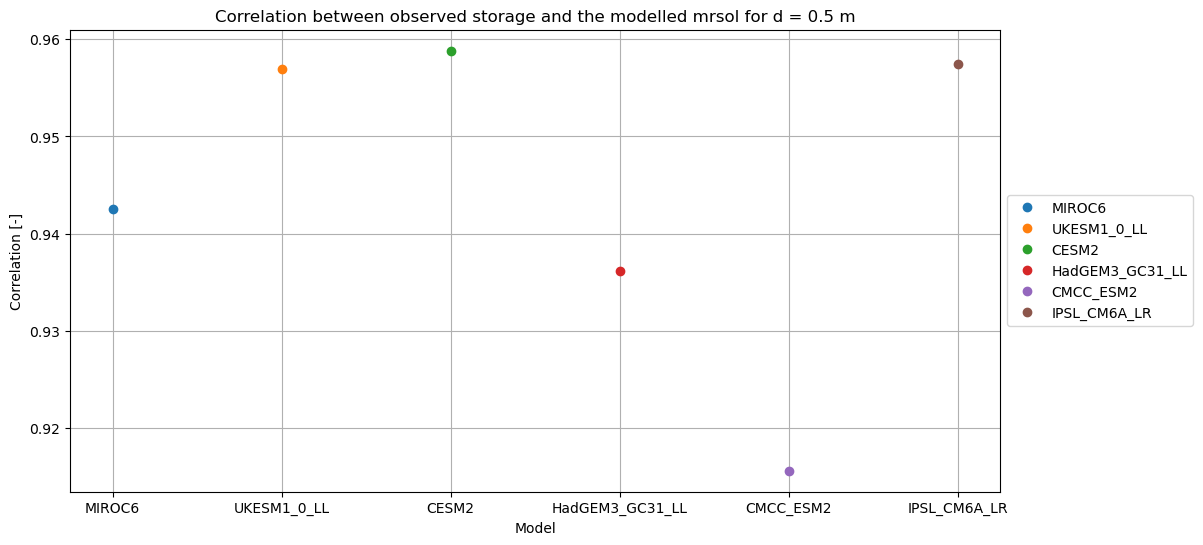

In [7]:
import scipy.stats

plt.figure(figsize = (12,6))
S = [MIROC6_mean , UKESM1_0_LL_mean , CESM2_mean , HadGEM3_GC31_LL_mean , CMCC_ESM2_mean , IPSL_CM6A_LR_mean]

label = ['MIROC6' , 'UKESM1_0_LL' , 'CESM2' , 'HadGEM3_GC31_LL' , 'CMCC_ESM2' , 'IPSL_CM6A_LR']

for i in range(len(S)):
    x = S[i]
    y = Storage
    pearsonr = scipy.stats.pearsonr(x, y)
    plt.plot(i , pearsonr[0] , marker = 'o' , linestyle = (0 , (0 , 100)) , label = label[i])

plt.title('Correlation between observed storage and the modelled mrsol for d = 0.5 m')
plt.ylabel('Correlation [-]')
plt.xlabel('Model')
plt.xticks([0,1,2,3,4,5] , ['MIROC6' , 'UKESM1_0_LL' , 'CESM2' , 'HadGEM3_GC31_LL' , 'CMCC_ESM2' , 'IPSL_CM6A_LR'])
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

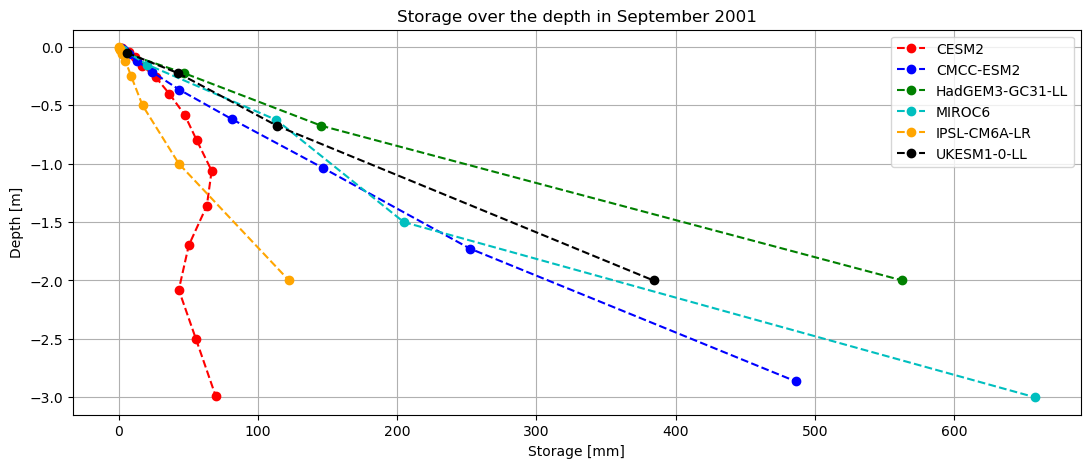

In [8]:
plt.figure(figsize = (13 , 5))

C = np.zeros(14)
d = np.zeros(14)

for i in range(14):
    C[i] = CESM2.mrsol[8 , i].mean() 
    d[i] = CESM2.depth[i]

plt.plot(C , -d , 'ro--' , label = 'CESM2')

C = np.zeros(10)
d = np.zeros(10)

for i in range(10):
    C[i] = CMCC_ESM2.mrsol[8 , i].mean() 
    d[i] = CMCC_ESM2.depth[i]

plt.plot(C , -d , 'bo--' , label = 'CMCC-ESM2')


C = np.zeros(4)
d = np.zeros(4)

for i in range(4):
    C[i] = HadGEM3_GC31_LL.mrsol[8 , i].mean() 
    d[i] = HadGEM3_GC31_LL.depth[i]

plt.plot(C , -d , 'go--' , label = 'HadGEM3-GC31-LL')

C = np.zeros(6)
d = np.zeros(6)

for i in range(6):
    C[i] = MIROC6.mrsol[8 , i].mean() 
    d[i] = MIROC6.depth[i]

plt.plot(C[0:5] , -d[0:5] , 'co--' , label = 'MIROC6')

#plt.ylim(-3 , 0)

C = np.zeros(10)
d = np.zeros(10)
Solay = [0.002 , 0.006 , 0.014 , 0.03 , 0.06 , 0.12 , 0.25 , 0.5 , 1.0 , 2.0]

for i in range(10):
    C[i] = IPSL_CM6A_LR.mrsol[8 , i].mean() 
    d[i] = Solay[i]
    
plt.plot(C , -d , color = 'orange' , marker = 'o' , linestyle = 'dashed' , label = 'IPSL-CM6A-LR')

C = np.zeros(4)
d = np.zeros(4)

for i in range(4):
    C[i] = UKESM1_0_LL.mrsol[8 , i].mean() 
    d[i] = UKESM1_0_LL.depth[i]

plt.plot(C , -d , 'ko--' , label = 'UKESM1-0-LL')

#plt.ylim(-3 , 0)
plt.title('Storage over the depth in September 2001')
plt.ylabel('Depth [m]')
plt.xlabel('Storage [mm]')
plt.grid()
plt.legend();

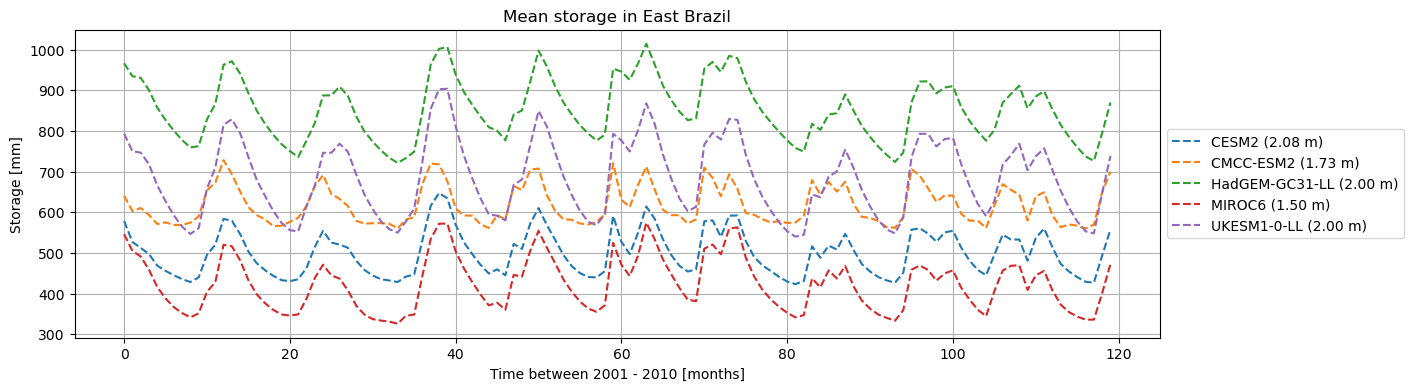

In [9]:
"""Calculating means for depth of layer close to 2 m"""

d = 2

for i in range(t):
    CESM2_mean[i] = CESM2.mrsol[i , 0:12].mean()*12
    CMCC_ESM2_mean[i] = CMCC_ESM2.mrsol[i , 0:9].mean()*9
    HadGEM3_GC31_LL_mean[i] = HadGEM3_GC31_LL.mrsol[i , 0:4].mean() * 4
    #IPSL_CM6A_LR_mean[i] = IPSL_CM6A_LR.mrsol[i , 0:5].mean() * 5
    MIROC6_mean[i] = MIROC6.mrsol[i , 0:4].mean() * 4
    UKESM1_0_LL_mean[i] = UKESM1_0_LL.mrsol[i , 0:4].mean() * 4
    

plt.figure(figsize = (14 , 4))
#plt.plot(Storage , label = 'Observation')
plt.plot(CESM2_mean , linestyle = 'dashed' , label = 'CESM2 (2.08 m)')
plt.plot(CMCC_ESM2_mean , linestyle = 'dashed' , label = 'CMCC-ESM2 (1.73 m)')
plt.plot(HadGEM3_GC31_LL_mean , label = 'HadGEM-GC31-LL (2.00 m)' , linestyle = 'dashed')
plt.plot(MIROC6_mean , label = 'MIROC6 (1.50 m)' , linestyle = 'dashed')
plt.plot(UKESM1_0_LL_mean , label = 'UKESM1-0-LL (2.00 m)' , linestyle = 'dashed')
plt.title('Mean storage in East Brazil')
plt.ylabel('Storage [mm]')
plt.xlabel('Time between 2001 - 2010 [months]')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

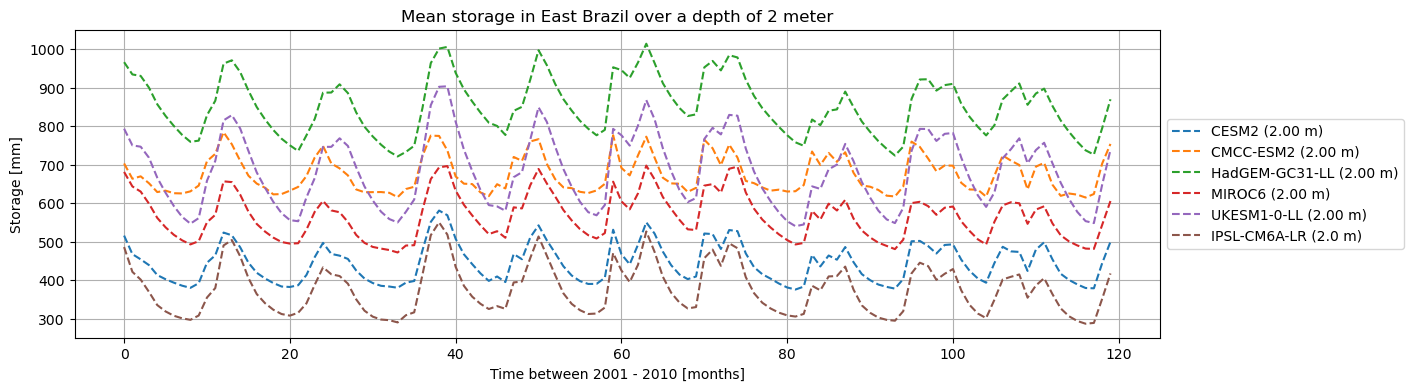

In [10]:
d = 2

for i in range(t):
    CESM2_mean[i] = CESM2.mrsol[i , 0:11].mean()*11 + (1 - (CESM2.depth[11] - d)/(CESM2.depth[11] - CESM2.depth[10]))*(CESM2.mrsol[i , 11].mean() - CESM2.mrsol[i , 10].mean())
    CMCC_ESM2_mean[i] = CMCC_ESM2.mrsol[i , 0:9].mean()*9 + (1 - (CMCC_ESM2.depth[9] - d)/(CMCC_ESM2.depth[9] - CMCC_ESM2.depth[8]))* (CMCC_ESM2.mrsol[i , 9].mean() - CMCC_ESM2.mrsol[i , 8].mean())
    HadGEM3_GC31_LL_mean[i] = HadGEM3_GC31_LL.mrsol[i , 0:4].mean() * 4
    IPSL_CM6A_LR_mean[i] = IPSL_CM6A_LR.mrsol[i , 0:11].mean() * 11
    MIROC6_mean[i] = MIROC6.mrsol[i , 0:4].mean() * 4 + (1 - (MIROC6.depth[4] - d)/(MIROC6.depth[4] - MIROC6.depth[3]))* (MIROC6.mrsol[i , 4].mean() - MIROC6.mrsol[i , 3].mean())
    UKESM1_0_LL_mean[i] = UKESM1_0_LL.mrsol[i , 0:4].mean() * 4
    

plt.figure(figsize = (14 , 4))
#plt.plot(Storage , label = 'Observation')
plt.plot(CESM2_mean , linestyle = 'dashed' , label = 'CESM2 (2.00 m)')
plt.plot(CMCC_ESM2_mean , linestyle = 'dashed' , label = 'CMCC-ESM2 (2.00 m)')
plt.plot(HadGEM3_GC31_LL_mean , label = 'HadGEM-GC31-LL (2.00 m)' , linestyle = 'dashed')
plt.plot(MIROC6_mean , label = 'MIROC6 (2.00 m)' , linestyle = 'dashed')
plt.plot(UKESM1_0_LL_mean , label = 'UKESM1-0-LL (2.00 m)' , linestyle = 'dashed')
plt.plot(IPSL_CM6A_LR_mean , label = 'IPSL-CM6A-LR (2.0 m)' , linestyle = 'dashed')
plt.title('Mean storage in East Brazil over a depth of 2 meter')
plt.ylabel('Storage [mm]')
plt.xlabel('Time between 2001 - 2010 [months]')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [11]:
print('FOR A DEPTH OF 2 meter')

print('----' * 24)

print(f'The maximum decrease in storage between February 2004 and October 2004')

print('----' * 24)
print(colored(f'The maximum decrease in storage in 2007 for  MIROC6          is equal to:           {MIROC6_mean[38] - MIROC6_mean[44]:.3f} mm' , 'yellow'))
print(colored(f'The maximum decrease in storage in 2007 for  UKESM1-0-LL     is equal to:           {UKESM1_0_LL_mean[38] - UKESM1_0_LL_mean[44]:.3f} mm' , 'red'))
print(colored(f'The maximum decrease in storage in 2007 for  CESM2           is equal to:           {CESM2_mean[38] - CESM2_mean[44]:.3f} mm' , 'red'))
print(colored(f'The maximum decrease in storage in 2007 for  HadGEM3-GC31-LL is equal to:           {HadGEM3_GC31_LL_mean[38] - HadGEM3_GC31_LL_mean[44]:.3f} mm' , 'red'))
print(colored(f'The maximum decrease in storage in 2007 for  CMCC-ESM2       is equal to:           {CMCC_ESM2_mean[38] - CMCC_ESM2_mean[44]:.3f} mm' , 'blue'))
print(colored(f'The maximum decrease in storage in 2007 for  IPSL-CM6A-LR    is equal to:           {IPSL_CM6A_LR_mean[38] - IPSL_CM6A_LR_mean[44]:.3f} mm' , 'green'))

print()

print('----' * 24)

print(f'The maximum decrease in storage between February 2007 and October 2007')

print('----' * 24)
print(colored(f'The maximum decrease in storage in 2007 for  MIROC6          is equal to:           {MIROC6_mean[73] - MIROC6_mean[81]:.3f} mm' , 'yellow'))
print(colored(f'The maximum decrease in storage in 2007 for  UKESM1_0_LL     is equal to:           {UKESM1_0_LL_mean[73] - UKESM1_0_LL_mean[81]:.3f} mm' , 'red'))
print(colored(f'The maximum decrease in storage in 2007 for  CESM2           is equal to:           {CESM2_mean[73] - CESM2_mean[81]:.3f} mm' , 'red'))
print(colored(f'The maximum decrease in storage in 2007 for  HadGEM-GC31-LL  is equal to:           {HadGEM3_GC31_LL_mean[73] - HadGEM3_GC31_LL_mean[81]:.3f} mm' , 'red'))
print(colored(f'The maximum decrease in storage in 2007 for  CMCC-ESM2       is equal to:           {CMCC_ESM2_mean[73] - CMCC_ESM2_mean[81]:.3f} mm' , 'blue'))
print(colored(f'The maximum decrease in storage in 2007 for  IPSL-CM6A-LR    is equal to:           {IPSL_CM6A_LR_mean[73] - IPSL_CM6A_LR_mean[81]:.3f} mm' , 'green'))

FOR A DEPTH OF 2 meter
------------------------------------------------------------------------------------------------
The maximum decrease in storage between February 2004 and October 2004
------------------------------------------------------------------------------------------------
The maximum decrease in storage in 2007 for  MIROC6          is equal to:           173.462 mm
The maximum decrease in storage in 2007 for  UKESM1-0-LL     is equal to:           307.667 mm
The maximum decrease in storage in 2007 for  CESM2           is equal to:           182.902 mm
The maximum decrease in storage in 2007 for  HadGEM3-GC31-LL is equal to:           192.738 mm
The maximum decrease in storage in 2007 for  CMCC-ESM2       is equal to:           156.566 mm
The maximum decrease in storage in 2007 for  IPSL-CM6A-LR    is equal to:           225.390 mm

------------------------------------------------------------------------------------------------
The maximum decrease in storage between Febr

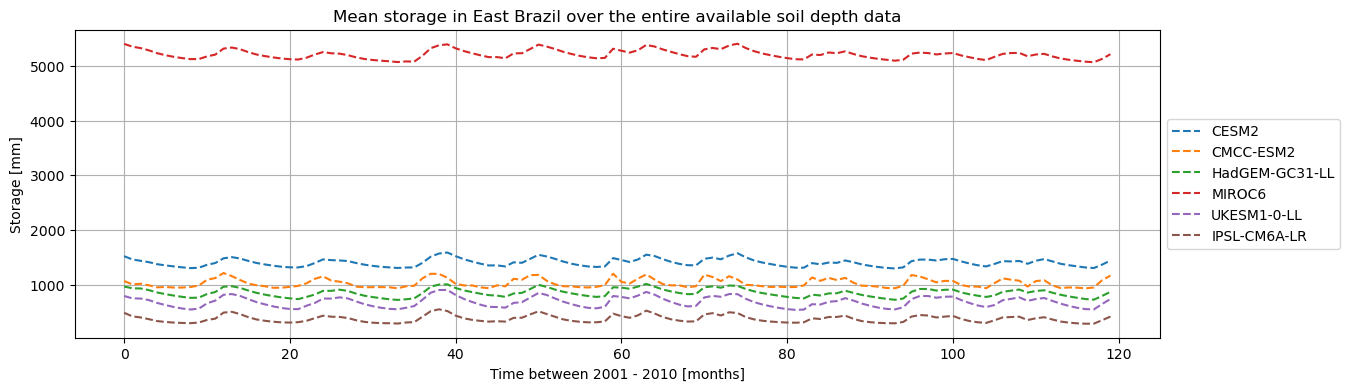

In [12]:
"""Until maximum depth"""

for i in range(t):
    CESM2_mean[i] = CESM2.mrsol[i , 0:20].mean()*20
    CMCC_ESM2_mean[i] = CMCC_ESM2.mrsol[i , 0:9].mean()*15
    HadGEM3_GC31_LL_mean[i] = HadGEM3_GC31_LL.mrsol[i , 0:4].mean() * 4
    IPSL_CM6A_LR_mean[i] = IPSL_CM6A_LR.mrsol[i , 0:11].mean() * 11
    MIROC6_mean[i] = MIROC6.mrsol[i , 0:6].mean() * 6
    UKESM1_0_LL_mean[i] = UKESM1_0_LL.mrsol[i , 0:4].mean() * 4
    

plt.figure(figsize = (14 , 4))
#plt.plot(Storage , label = 'Observation')
plt.plot(CESM2_mean , linestyle = 'dashed' , label = 'CESM2')
plt.plot(CMCC_ESM2_mean , linestyle = 'dashed' , label = 'CMCC-ESM2')
plt.plot(HadGEM3_GC31_LL_mean , label = 'HadGEM-GC31-LL' , linestyle = 'dashed')
plt.plot(MIROC6_mean , label = 'MIROC6' , linestyle = 'dashed')
plt.plot(UKESM1_0_LL_mean , label = 'UKESM1-0-LL' , linestyle = 'dashed')
plt.plot(IPSL_CM6A_LR_mean , label = 'IPSL-CM6A-LR' , linestyle = 'dashed')
plt.title('Mean storage in East Brazil over the entire available soil depth data')
plt.ylabel('Storage [mm]')
plt.xlabel('Time between 2001 - 2010 [months]')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [13]:
print('MAXIMUM DEPTH')

print('----' * 24)

print(f'The maximum decrease in storage between February 2004 and October 2004')

print('----' * 24)
print(colored(f'The maximum decrease in storage in 2007 for  MIROC6          is equal to:           {MIROC6_mean[38] - MIROC6_mean[44]:.3f} mm' , 'yellow'))
print(colored(f'The maximum decrease in storage in 2007 for  UKESM1-0-LL     is equal to:           {UKESM1_0_LL_mean[38] - UKESM1_0_LL_mean[44]:.3f} mm' , 'red'))
print(colored(f'The maximum decrease in storage in 2007 for  CESM2           is equal to:           {CESM2_mean[38] - CESM2_mean[44]:.3f} mm' , 'red'))
print(colored(f'The maximum decrease in storage in 2007 for  HadGEM3-GC31-LL is equal to:           {HadGEM3_GC31_LL_mean[38] - HadGEM3_GC31_LL_mean[44]:.3f} mm' , 'red'))
print(colored(f'The maximum decrease in storage in 2007 for  CMCC-ESM2       is equal to:           {CMCC_ESM2_mean[38] - CMCC_ESM2_mean[44]:.3f} mm' , 'blue'))
print(colored(f'The maximum decrease in storage in 2007 for  IPSL-CM6A-LR    is equal to:           {IPSL_CM6A_LR_mean[38] - IPSL_CM6A_LR_mean[44]:.3f} mm' , 'green'))

print()
print('----' * 24)

print(f'The maximum decrease in storage between February 2007 and October 2007')

print('----' * 24)
print(colored(f'The maximum decrease in storage in 2007 for  MIROC6          is equal to:           {MIROC6_mean[73] - MIROC6_mean[81]:.3f} mm' , 'yellow'))
print(colored(f'The maximum decrease in storage in 2007 for  UKESM1_0_LL     is equal to:           {UKESM1_0_LL_mean[73] - UKESM1_0_LL_mean[81]:.3f} mm' , 'red'))
print(colored(f'The maximum decrease in storage in 2007 for  CESM2           is equal to:           {CESM2_mean[73] - CESM2_mean[81]:.3f} mm' , 'red'))
print(colored(f'The maximum decrease in storage in 2007 for  HadGEM-GC31-LL  is equal to:           {HadGEM3_GC31_LL_mean[73] - HadGEM3_GC31_LL_mean[81]:.3f} mm' , 'red'))
print(colored(f'The maximum decrease in storage in 2007 for  CMCC-ESM2       is equal to:           {CMCC_ESM2_mean[73] - CMCC_ESM2_mean[81]:.3f} mm' , 'blue'))
print(colored(f'The maximum decrease in storage in 2007 for  IPSL-CM6A-LR    is equal to:           {IPSL_CM6A_LR_mean[73] - IPSL_CM6A_LR_mean[81]:.3f} mm' , 'green'))

print()

MAXIMUM DEPTH
------------------------------------------------------------------------------------------------
The maximum decrease in storage between February 2004 and October 2004
------------------------------------------------------------------------------------------------
The maximum decrease in storage in 2007 for  MIROC6          is equal to:           217.167 mm
The maximum decrease in storage in 2007 for  UKESM1-0-LL     is equal to:           307.667 mm
The maximum decrease in storage in 2007 for  CESM2           is equal to:           218.431 mm
The maximum decrease in storage in 2007 for  HadGEM3-GC31-LL is equal to:           192.738 mm
The maximum decrease in storage in 2007 for  CMCC-ESM2       is equal to:           260.549 mm
The maximum decrease in storage in 2007 for  IPSL-CM6A-LR    is equal to:           225.390 mm

------------------------------------------------------------------------------------------------
The maximum decrease in storage between February 2007

In [14]:
"""Function to determine the depth over which the storage decreases"""

def Depth(model , label , months):
    for i in range(len(model)):
        M1 = np.zeros(len(model[i].depth))
        M2 = np.zeros(len(model[i].depth))
        for j in range(len(model[i].depth)):
            M1[j] = model[i].mrsol[months[0] , 0:j+1].mean()*(j+1) - model[i].mrsol[months[1] , 0:j+1].mean() * (j+1)
            if M1[j] - M1[j-1] >= 0:
                print(f'Decrease in {label[i]} model storage from: 0 until {float(model[i].depth[j - 1]):.3f} m         (and this is not yet the final layer depth of the model)')
                #print()
                #print(M1)
                #print()
                break
        else:
            print(f'Decrease in {label[i]} model storage from: 0 until {float(model[i].depth[j]):.3f} m')
            
def Depth_IPSL(model , months):
    M1 = np.zeros(len(model.solay))
    M2 = np.zeros(len(model.solay))
    for j in range(len(model.solay)):
        M1[j] = model.mrsol[months[0] , 0:j+1].mean()*(j + 1) - model.mrsol[months[1] , 0:j+1].mean()*(j+1)
        if M1[j] - M1[j-1] <= 0:
            print(f': 0 until layer {float(model.solay[j - 1]):.3f}     and this is not yet the final layer of the model')
            break
    else:
        print(f'Decrease IPSL-CM6A-LR model storage from: 0 until layer {float(model.solay[j]):.3f} ')

In [15]:
print('----' * 7)
print('For the dry year of 2004:')
print('----' * 7)
print()

model = [MIROC6 , UKESM1_0_LL , CESM2 , HadGEM3_GC31_LL , CMCC_ESM2]
label = ['MIROC6' , 'UKESM1_0_LL'  , 'CESM2' , 'HadGEM3_GC31_LL' , 'CMCC_ESM2']
months = [44 , 38]

Depth(model = model , label = label , months = months)
Depth_IPSL(model = IPSL_CM6A_LR , months = months)


print()
print('----' * 7)
print('For the dry year of 2007:')
print('----' * 7)
print()

model = [MIROC6 , UKESM1_0_LL , CESM2 , HadGEM3_GC31_LL , CMCC_ESM2]
label = ['MIROC6' , 'UKESM1_0_LL'  , 'CESM2' , 'HadGEM3_GC31_LL' , 'CMCC_ESM2']
months = [81 , 73]

Depth(model = model , label = label , months = months)
Depth_IPSL(model = IPSL_CM6A_LR , months = months)

----------------------------
For the dry year of 2004:
----------------------------

Decrease in MIROC6 model storage from: 0 until 9.000 m
Decrease in UKESM1_0_LL model storage from: 0 until 2.000 m
Decrease in CESM2 model storage from: 0 until 5.060 m         (and this is not yet the final layer depth of the model)
Decrease in HadGEM3_GC31_LL model storage from: 0 until 2.000 m
Decrease in CMCC_ESM2 model storage from: 0 until 2.865 m         (and this is not yet the final layer depth of the model)
: 0 until layer 11.000     and this is not yet the final layer of the model

----------------------------
For the dry year of 2007:
----------------------------

Decrease in MIROC6 model storage from: 0 until 9.000 m
Decrease in UKESM1_0_LL model storage from: 0 until 2.000 m
Decrease in CESM2 model storage from: 0 until 8.030 m
Decrease in HadGEM3_GC31_LL model storage from: 0 until 2.000 m
Decrease in CMCC_ESM2 model storage from: 0 until 2.865 m         (and this is not yet the final la